In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import math
from pandas.api.types import CategoricalDtype
import os

In [3]:
def equilibrium(t):
    pi2 = math.pi * 2
    c = math.pi * 3000
    wavelength = t / c
    gradient = 100 * t / (c / pi2)
    amplitude = 100 * t / (c / pi2)
    offset = gradient + amplitude * math.sin(wavelength * t)
    equilibrium = 200 + offset
    return int(round(equilibrium, 0))

In [4]:
TraderTypes = pd.Series(["ZIP", "ZIC", "SHVR", "GVWY", "PRZI", "PRSH"])

n_trials = 99
n = 0

os.remove('statistics_ZIP.csv')
os.remove('statistics_ZIP2.csv')
os.remove('statistics_ZIC.csv')
os.remove('statistics_ZIC2.csv')
os.remove('statistics_SHVR.csv')
os.remove('statistics_SHVR2.csv')
os.remove('statistics_GVWY.csv')
os.remove('statistics_GVWY2.csv')
os.remove('statistics_PRSH.csv')
os.remove('statistics_PRSH2.csv')
os.remove('statistics_PRZI.csv')
os.remove('statistics_PRZI2.csv')

for n in range(0,n_trials):
    
    blotters = pd.read_csv('TEST_' + str(n) + '_blotters.csv', header=0)
    blotters = blotters.reset_index()
    blotters = blotters.iloc[:,[3,4,5,6]]
    blotters.columns = ['Time', 'Price', 'Party1', 'Party2']
    blotters['Time'] = blotters['Time'].str.replace('\'time\':', "")
    blotters['Price'] = blotters['Price'].str.replace('\'price\':', "")
    blotters['Party1'] = blotters['Party1'].str.replace('\'party1\':', "")
    blotters['Party2'] = blotters['Party2'].str.replace('\'party2\':', "")
    blotters['Party1'] = blotters['Party1'].str.replace("\'","")
    blotters['Party2'] = blotters['Party2'].str.replace("\'","")


    blotters['BuyerType'] = blotters.Party1
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B0.'), 'ZIP', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B1.'), 'ZIC', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B2.'), 'SHVR', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B3.'), 'GVWY', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B4.'), 'PRZI', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B5.'), 'PRSH', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B0.'), 'ZIP', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B1.'), 'ZIC', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B2.'), 'SHVR', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B3.'), 'GVWY', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B4.'), 'PRZI', blotters.BuyerType)
    blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B5.'), 'PRSH', blotters.BuyerType)
    blotters.BuyerType = blotters.BuyerType.astype(CategoricalDtype())

    blotters['SellerType'] = blotters.Party1
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S0.'), 'ZIP', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S1.'), 'ZIC', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S2.'), 'SHVR', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S3.'), 'GVWY', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S4.'), 'PRZI', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S5.'), 'PRSH', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S0.'), 'ZIP', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S1.'), 'ZIC', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S2.'), 'SHVR', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S3.'), 'GVWY', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S4.'), 'PRZI', blotters.SellerType)
    blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S5.'), 'PRSH', blotters.SellerType)
    blotters.SellerType = blotters.SellerType.astype(CategoricalDtype())

    blotters = blotters.drop_duplicates()
    blotters = blotters.dropna()
    blotters.Price = pd.to_numeric(blotters.Price)
    blotters.Time = pd.to_numeric(blotters.Time)
    blotters.sort_values(by='Time', inplace=True)

    blotters['Equilibrium'] = blotters.Time.apply(equilibrium)
    blotters['NetProfit'] = blotters.Price - blotters.Equilibrium
    blotters['NetProfit2'] = blotters.Equilibrium - blotters.Price
    blotters['Cum_Profit'] = blotters['NetProfit'].cumsum()


    groupby_buyers = blotters.groupby('BuyerType')
    groupby_sellers = blotters.groupby('SellerType')

    ZIP_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('ZIP').NetProfit.describe()))
    ZIC_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('ZIC').NetProfit.describe()))
    PRZI_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('PRZI').NetProfit.describe()))
    PRSH_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('PRSH').NetProfit.describe()))
    GVWY_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('GVWY').NetProfit.describe()))
    SHVR_buyers = np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('SHVR').NetProfit.describe()))

    ZIP_buyers.to_csv('statistics_ZIP.csv', mode='a', index=False, header=False)
    ZIC_buyers.to_csv('statistics_ZIC.csv', mode='a', index=False, header=False)
    GVWY_buyers.to_csv('statistics_GVWY.csv', mode='a', index=False, header=False)
    SHVR_buyers.to_csv('statistics_SHVR.csv', mode='a', index=False, header=False)
    PRZI_buyers.to_csv('statistics_PRZI.csv', mode='a', index=False, header=False)
    PRSH_buyers.to_csv('statistics_PRSH.csv', mode='a', index=False, header=False)

    ZIP_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('ZIP').NetProfit2.describe()))
    ZIC_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('ZIC').NetProfit2.describe()))
    PRZI_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('PRZI').NetProfit2.describe()))
    PRSH_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('PRSH').NetProfit2.describe()))
    GVWY_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('GVWY').NetProfit2.describe()))
    SHVR_sellers = np.transpose(pd.DataFrame(blotters.groupby('SellerType').get_group('SHVR').NetProfit2.describe()))

    ZIP_sellers.to_csv('statistics_ZIP2.csv', mode='a', index=False, header=False)
    ZIC_sellers.to_csv('statistics_ZIC2.csv', mode='a', index=False, header=False)
    GVWY_sellers.to_csv('statistics_GVWY2.csv', mode='a', index=False, header=False)
    SHVR_sellers.to_csv('statistics_SHVR2.csv', mode='a', index=False, header=False)
    PRZI_sellers.to_csv('statistics_PRZI2.csv', mode='a', index=False, header=False)
    PRSH_sellers.to_csv('statistics_PRSH2.csv', mode='a', index=False, header=False)
    
    print('trial',n,'complete')
    
    n = n+1
    
print('All statistics successfully exported to csv files')

trial 0 complete
trial 1 complete
trial 2 complete
trial 3 complete
trial 4 complete
trial 5 complete
trial 6 complete
trial 7 complete
trial 8 complete
trial 9 complete
trial 10 complete
trial 11 complete
trial 12 complete
trial 13 complete
trial 14 complete
trial 15 complete
trial 16 complete
trial 17 complete
trial 18 complete
trial 19 complete
trial 20 complete
trial 21 complete
trial 22 complete
trial 23 complete
trial 24 complete
trial 25 complete
trial 26 complete
trial 27 complete
trial 28 complete
trial 29 complete
trial 30 complete
trial 31 complete
trial 32 complete
trial 33 complete
trial 34 complete
trial 35 complete
trial 36 complete
trial 37 complete
trial 38 complete
trial 39 complete
trial 40 complete
trial 41 complete
trial 42 complete
trial 43 complete
trial 44 complete
trial 45 complete
trial 46 complete
trial 47 complete
trial 48 complete
trial 49 complete
trial 50 complete
trial 51 complete
trial 52 complete
trial 53 complete
trial 54 complete
trial 55 complete
tr

In [5]:
ZIP_buyers

,count,mean,std,min,25%,50%,75%,max
NetProfit,523.0,37.038241,152.042362,-284.0,-106.0,66.0,162.0,334.0


In [6]:
np.transpose(pd.DataFrame(blotters.groupby('BuyerType').get_group('ZIP').Cum_Profit

SyntaxError: unexpected EOF while parsing (<ipython-input-6-c2ef4cc84f7d>, line 1)

In [7]:
CumProfit_ZIP = blotters.groupby('BuyerType').get_group('ZIP')
CumProfit_ZIC = blotters.groupby('BuyerType').get_group('ZIC')
CumProfit_GVWY = blotters.groupby('BuyerType').get_group('GVWY')
CumProfit_SHVR = blotters.groupby('BuyerType').get_group('SHVR')
CumProfit_ZIC

,Time,Price,Party1,Party2,BuyerType,SellerType,Equilibrium,NetProfit,NetProfit2,Cum_Profit
1350,695.275000,229,B19,S19,ZIC,ZIC,286,-57,57,22074
1238,695.875000,227,B18,S11,ZIC,ZIC,288,-61,61,22013
1239,715.933333,213,B18,S16,ZIC,ZIC,208,5,-5,23049
1240,733.525000,210,B18,S07,ZIC,ZIP,274,-64,64,23615
1351,757.341667,243,B19,S07,ZIC,ZIP,204,39,-39,25492
...,...,...,...,...,...,...,...,...,...,...
852,3594.841667,469,S48,B13,ZIC,PRZI,677,-208,208,177668
1236,3595.766667,544,S42,B17,ZIC,PRZI,643,-99,99,176942
1129,3595.950000,462,S39,B16,ZIC,GVWY,623,-161,161,176688
763,3597.650000,584,B12,S23,ZIC,SHVR,340,244,-244,176903


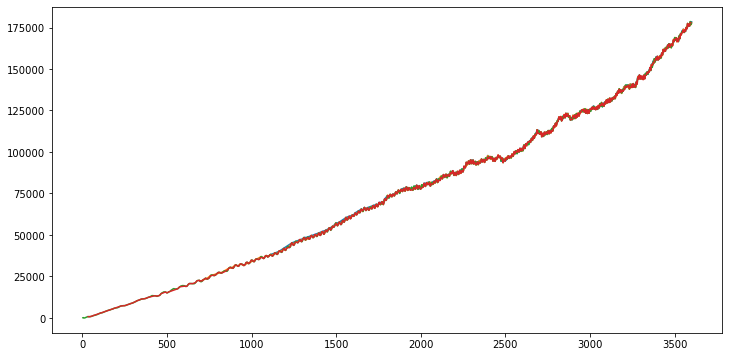

In [30]:
fig1,ax1 = plt.subplots(figsize=(12, 6))
ax1 = plt.plot(CumProfit_ZIP.Time, CumProfit_ZIP.Cum_Profit)
ax1 = plt.plot(CumProfit_ZIC.Time, CumProfit_ZIC.Cum_Profit)
ax1 = plt.plot(CumProfit_GVWY.Time, CumProfit_GVWY.Cum_Profit)
ax1 = plt.plot(CumProfit_SHVR.Time, CumProfit_SHVR.Cum_Profit)